In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

- Criando uma matriz de confusão fictícia para um modelo de classificação binária (cachorro ou gato)
- Exemplo: 100 amostras, 60 são gatos e 40 são cachorros
- Matriz:
# [[50, 10],  <- Verdadeiro Gato (50 corretos, 10 classificados erroneamente como cachorro)
#  [5, 35]]   <- Verdadeiro Cachorro (5 classificados erroneamente como gato, 35 corretos)

In [22]:
# Valores reais e previstos para gatos e cachorros (base fictícia)
y_true = np.array([0]*60 + [1]*40)  # 0 = Gato, 1 = Cachorro
y_pred = np.array([0]*50 + [1]*10 + [0]*5 + [1]*35)

In [23]:
# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred)

In [24]:
# Calculando as métricas solicitadas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)  # Também chamado de sensibilidade
f1 = f1_score(y_true, y_pred)

In [25]:
# Calculando a curva ROC e a AUC
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

In [26]:
# Exibindo os resultados
metrics = {
    "Matriz de Confusão": conf_matrix,
    "Acurácia": accuracy,
    "Precisão": precision,
    "Sensibilidade (Recall)": recall,
    "F1-Score": f1,
    "Área sob a curva ROC (AUC)": roc_auc,
}

In [27]:
print("Matriz:", conf_matrix)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Sensibilidade:", recall)
print("F1-Score", f1)
print("Área sob a curva ROC", roc_auc)

Matriz: [[50 10]
 [ 5 35]]
Acurácia: 0.85
Precisão: 0.7777777777777778
Sensibilidade: 0.875
F1-Score 0.823529411764706
Área sob a curva ROC 0.8541666666666666


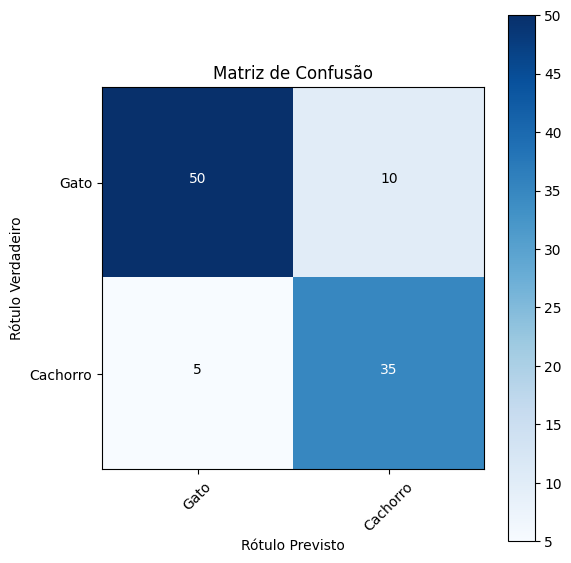

In [28]:
# Exibindo a Matriz de Confusão
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.colorbar()
tick_marks = [0, 1]
classes = ["Gato", "Cachorro"]
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Adicionando os valores na matriz
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, f"{conf_matrix[i, j]}", horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')
plt.tight_layout()
plt.show()

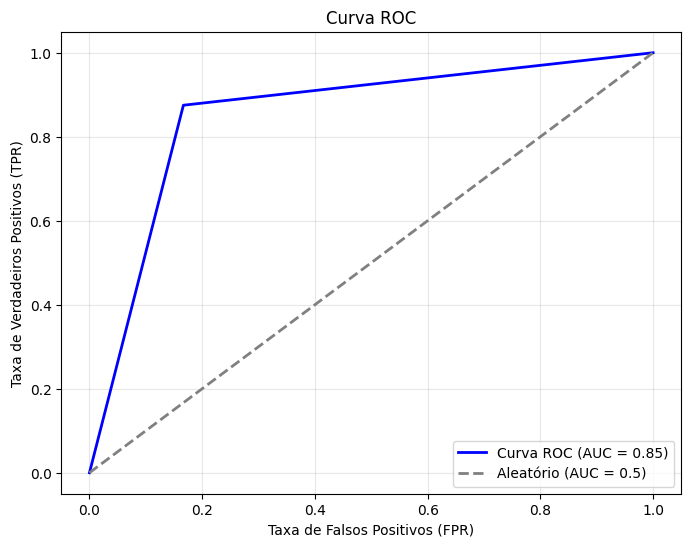

In [29]:
# Exibindo a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label="Aleatório (AUC = 0.5)")
plt.title("Curva ROC")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
